In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# TARGET DISTRIBUTION
mu1, sigma1 = 0, np.sqrt(2.5)
mu2, sigma2 = 10, np.sqrt(2.5)
eta = 0.3

def k(x):
    """Kernel of the mixture distribution."""
    return eta * np.exp(-0.5 * (x - mu1)**2 / sigma1**2) + (1 - eta) * np.exp(-0.5 * (x - mu2)**2 / sigma2**2)

# PROPOSAL DENSITY AND ENVELOPE CONSTANT M
mu3, sigma3 = 8, 6
g = lambda x: norm.pdf(x, mu3, sigma3)
M = 12


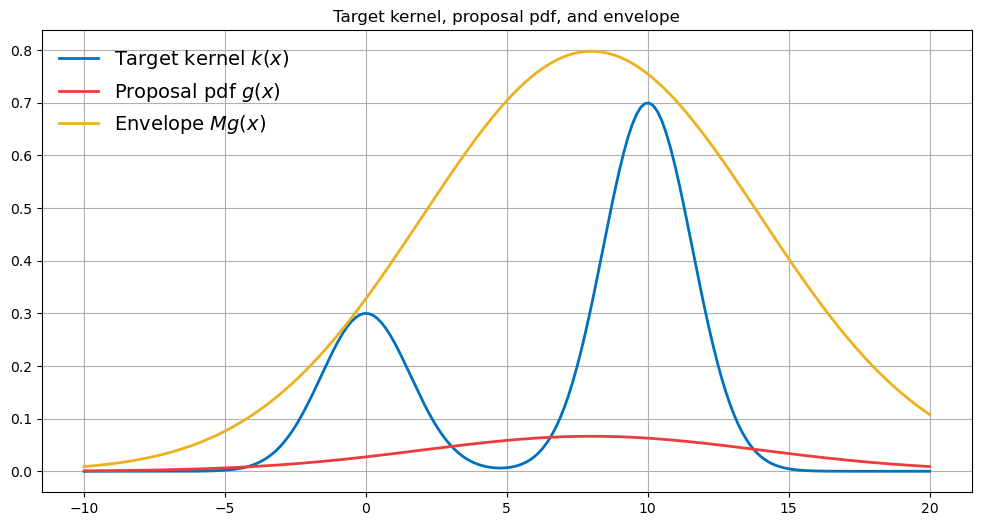

In [3]:
# PLOT KERNEL, PROPOSAL DENSITY, AND ENVELOPE

# Colors
colors = {
    "color1": [0, 0.4470, 0.7410],
    "color2": [0.8500, 0.3250, 0.0980],
    "color3": [0.9290, 0.6940, 0.1250],
    "color4": [0.4940, 0.1840, 0.5560],
    "color5": [0.4660, 0.6740, 0.1880],
    "color6": [0.3010, 0.7450, 0.9330],
    "color7": [0.6350, 0.0780, 0.1840],
    "color8": [238/255, 59/255, 59/255]  # brown2 #ee3b3b
}


xlow, xhig = -10, 20
N = 200
xvec = np.linspace(xlow, xhig, N)
kvec = k(xvec)
gvec = g(xvec)
Mgvec= M*g(xvec)

# PLOT KERNEL, PROPOSAL DENSITY, AND ENVELOPE 
plt.figure(figsize=(12, 6))
plt.plot(xvec,kvec, linewidth=2, color=colors["color1"], label='Target kernel $k(x)$')
plt.plot(xvec, gvec, linewidth=2, color=colors["color8"], label='Proposal pdf $g(x)$')
plt.plot(xvec, Mgvec, linewidth=2, color=colors["color3"], label='Envelope $Mg(x)$')
plt.grid(True)
plt.legend(loc='upper left',fontsize=14,frameon=False)
plt.title("Target kernel, proposal pdf, and envelope")
plt.show()


In [4]:
# MAKE DRAWS FROM PROPOSAL AND COMPUTE ACCEPTANCE-REJECTION SAMPLING

Ndraws = 200000                                  # Number of draws
xdraws = mu3 + sigma3 * np.random.randn(Ndraws)  # Draws from proposal density
prob = k(xdraws) / (M*g(xdraws))                 # Probability of acceptance

udraws = np.random.rand(Ndraws)                  # Draw uniforms
xaccept = xdraws[udraws < prob]                  # Draws from target distribution

# Calculate the fraction of accepted draws (estimate of acceptance probability)
NA = len(xaccept) / Ndraws
print('Acceptance rate:',NA)

Acceptance rate: 0.33138


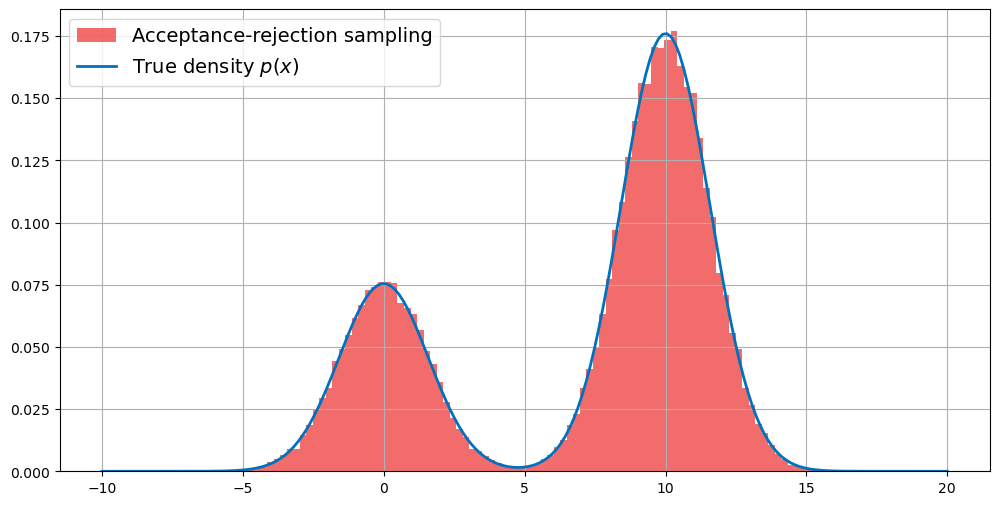

In [5]:
# PLOT ACCEPTANCE-REJECTION SAMPLES AND TRUE DENSITY

plt.figure(figsize=(12, 6))
plt.hist(xaccept, bins=100, density=True, alpha=0.75, color=colors["color8"], label='Acceptance-rejection sampling')
plt.plot(xvec,kvec/(M*NA),linewidth=2, color=colors["color1"], label='True density $p(x)$')
plt.grid(True)
plt.legend(loc='upper left', fontsize=14)
plt.show()

